# Recurrent Neural Network

![LSTM](imgs/LSTM3-chain.png)

![LSTM](imgs/LSTM2-notation.png)



![LSTM](imgs/LSTM3-focus-f.png)

![LSTM](imgs/LSTM3-focus-i.png)

![LSTM](imgs/LSTM3-focus-C.png)

![LSTM](imgs/LSTM3-focus-o.png)

## From pytorch documentation

\begin{array}{ll} \\
    f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
    i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
    g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
    c_t = f_t * c_{(t-1)} + i_t * g_t \\
    o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\    
    h_t = o_t * \tanh(c_t) \\
\end{array}

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

batch_size = 2
seq_len = 10
input_size = 3
hidden_size = 4 

inputs = torch.randn(seq_len, batch_size, input_size)
inputs

tensor([[[-1.0511, -1.2613,  0.7664],
         [ 0.2448, -0.8163, -0.0296]],

        [[ 1.1750, -0.5853,  0.3285],
         [-0.8136,  1.5261, -1.8419]],

        [[ 0.4746,  0.6109,  2.3574],
         [ 0.4926, -0.2901, -0.0702]],

        [[-0.5164,  0.0244, -0.0032],
         [ 0.5260, -1.3630,  0.6926]],

        [[ 0.8845,  0.5479,  0.5138],
         [-0.5159, -0.3496,  1.0330]],

        [[ 1.4786, -0.2551,  0.9379],
         [ 0.7103,  1.4898,  0.8830]],

        [[-0.8963,  1.5017,  0.4556],
         [ 0.3166, -0.4448,  0.1659]],

        [[ 0.6303, -1.0407, -0.6283],
         [ 0.6218, -0.0825,  0.2399]],

        [[-0.7028,  0.5837, -0.8596],
         [-0.2575, -1.3198, -0.0351]],

        [[ 1.5892,  0.6892,  0.1056],
         [-0.1241,  2.5676,  0.8052]]])

In [2]:
lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)

In [3]:
## hidden_0 = (h_0, c_0)
hidden_0 = (torch.zeros(1, batch_size, hidden_size), torch.zeros(1, batch_size, hidden_size))

In [4]:
lstm_out, lstm_hidden = lstm(inputs)
lstm_out.shape

torch.Size([10, 2, 4])

In [5]:
lstm_out

tensor([[[ 0.0959, -0.1320, -0.0067,  0.0662],
         [ 0.0073, -0.0925, -0.0486,  0.0990]],

        [[-0.0076, -0.2195, -0.0844,  0.1473],
         [ 0.2227, -0.0923,  0.2469,  0.0069]],

        [[ 0.1013, -0.5379, -0.1066,  0.0890],
         [ 0.0693, -0.2018,  0.0484,  0.0711]],

        [[ 0.1607, -0.3430, -0.0485,  0.0651],
         [ 0.0159, -0.2670, -0.0493,  0.1449]],

        [[ 0.0541, -0.4162, -0.1013,  0.0666],
         [ 0.1495, -0.3597, -0.0442,  0.1110]],

        [[-0.0312, -0.4489, -0.1356,  0.1399],
         [ 0.1588, -0.4835, -0.0700,  0.0115]],

        [[ 0.3148, -0.4199,  0.0726, -0.0018],
         [ 0.0424, -0.3564, -0.0869,  0.0696]],

        [[ 0.0155, -0.2154, -0.0288,  0.0884],
         [ 0.0199, -0.3429, -0.1155,  0.0937]],

        [[ 0.1788, -0.1908,  0.1507,  0.0107],
         [ 0.0310, -0.2436, -0.0863,  0.1225]],

        [[ 0.0113, -0.3244,  0.0020,  0.0845],
         [ 0.3328, -0.4650,  0.0980, -0.0854]]], grad_fn=<StackBackward>)

If we want to put hidden inputs to zeros, there is no need to provide them.

In [6]:
lstm_out, lstm_hidden = lstm(inputs)
lstm_out

tensor([[[ 0.0959, -0.1320, -0.0067,  0.0662],
         [ 0.0073, -0.0925, -0.0486,  0.0990]],

        [[-0.0076, -0.2195, -0.0844,  0.1473],
         [ 0.2227, -0.0923,  0.2469,  0.0069]],

        [[ 0.1013, -0.5379, -0.1066,  0.0890],
         [ 0.0693, -0.2018,  0.0484,  0.0711]],

        [[ 0.1607, -0.3430, -0.0485,  0.0651],
         [ 0.0159, -0.2670, -0.0493,  0.1449]],

        [[ 0.0541, -0.4162, -0.1013,  0.0666],
         [ 0.1495, -0.3597, -0.0442,  0.1110]],

        [[-0.0312, -0.4489, -0.1356,  0.1399],
         [ 0.1588, -0.4835, -0.0700,  0.0115]],

        [[ 0.3148, -0.4199,  0.0726, -0.0018],
         [ 0.0424, -0.3564, -0.0869,  0.0696]],

        [[ 0.0155, -0.2154, -0.0288,  0.0884],
         [ 0.0199, -0.3429, -0.1155,  0.0937]],

        [[ 0.1788, -0.1908,  0.1507,  0.0107],
         [ 0.0310, -0.2436, -0.0863,  0.1225]],

        [[ 0.0113, -0.3244,  0.0020,  0.0845],
         [ 0.3328, -0.4650,  0.0980, -0.0854]]], grad_fn=<StackBackward>)

Finally the last output is the output of RRR. We can get it by

In [7]:
lstm_out[-1]

tensor([[ 0.0113, -0.3244,  0.0020,  0.0845],
        [ 0.3328, -0.4650,  0.0980, -0.0854]], grad_fn=<SelectBackward>)

It is often convient to have batches as the first dimension of the input. One can do it by adding `batch_first=True` parameter.

In [8]:
lstm_batch_first = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True) 
inputs_batch_first = torch.randn(batch_size, seq_len, input_size)
inputs_batch_first

tensor([[[ 0.4995,  0.3639,  1.0023],
         [ 1.0267, -0.0418, -1.1803],
         [-1.2794,  0.5719, -0.9201],
         [ 0.5916, -0.1258, -0.5609],
         [ 0.5599,  1.4059, -2.3406],
         [ 0.3924,  3.0559,  1.2309],
         [ 1.4677, -0.8471, -0.8881],
         [ 0.6779, -0.4732,  0.2142],
         [-0.3178,  0.0881,  0.3831],
         [-0.4190, -1.8207, -0.4366]],

        [[ 0.5097, -0.3637,  2.2172],
         [-0.0164,  2.0788,  0.6666],
         [-0.0614, -0.8359,  0.3453],
         [ 1.7959,  1.3562,  0.5197],
         [-0.2985, -1.9809,  0.8117],
         [-0.6387, -0.1323,  0.6102],
         [-0.2652,  0.7346, -0.0485],
         [-0.6944,  1.0064, -0.1709],
         [-0.7343,  1.0906,  0.3458],
         [ 1.1296,  0.8161,  0.1510]]])

In [9]:
lstm_out, lstm_hidden = lstm_batch_first(inputs_batch_first)
lstm_out

tensor([[[ 0.0180,  0.0958, -0.0386, -0.0083],
         [ 0.1155,  0.0670, -0.0143, -0.2921],
         [ 0.2107,  0.0477, -0.0457, -0.0575],
         [ 0.1591,  0.0707, -0.0224, -0.1556],
         [ 0.1875, -0.0190, -0.0561, -0.3077],
         [ 0.3834,  0.0082, -0.2214, -0.0712],
         [ 0.1258,  0.0991,  0.0134, -0.3009],
         [ 0.0858,  0.1459,  0.0551, -0.2215],
         [ 0.0719,  0.1385, -0.0023, -0.0827],
         [-0.0731,  0.2035,  0.0567, -0.1343]],

        [[-0.1764,  0.1921,  0.0474,  0.0020],
         [ 0.1407,  0.0510, -0.0922,  0.0498],
         [-0.0446,  0.1757,  0.0133, -0.0043],
         [ 0.0835,  0.0420, -0.0943, -0.1630],
         [-0.1814,  0.2539,  0.0805, -0.0462],
         [-0.0699,  0.1519,  0.0283, -0.0131],
         [ 0.1240,  0.0779, -0.0393,  0.0159],
         [ 0.2013,  0.0538, -0.0800,  0.1170],
         [ 0.1948,  0.0586, -0.1122,  0.1770],
         [ 0.1814,  0.0569, -0.1241, -0.0141]]], grad_fn=<TransposeBackward0>)

Then we get the finial output by:

In [10]:
lstm_out[:, -1]

tensor([[-0.0731,  0.2035,  0.0567, -0.1343],
        [ 0.1814,  0.0569, -0.1241, -0.0141]], grad_fn=<SelectBackward>)

## Embedings

In [11]:
dict_size = 100
sentences = torch.randint(dict_size, (batch_size, seq_len))
sentences

tensor([[39, 19, 89, 37, 56, 68, 20, 20, 92, 38],
        [11, 41, 45, 99, 83, 54, 13, 41, 89, 43]])

In [12]:
embedding_dim = 3
embedding = nn.Embedding(dict_size, embedding_dim)

In [13]:
sentences_embedded = embedding(sentences)
sentences_embedded

tensor([[[-0.8193,  0.7358,  0.8764],
         [-1.2957,  0.2990,  0.6528],
         [-0.4799, -0.6350, -0.1438],
         [ 0.4397, -1.0167, -1.0566],
         [-1.3190,  0.8336,  1.5785],
         [-0.1942, -2.1960, -0.0441],
         [ 0.6278, -0.5967, -0.7711],
         [ 0.6278, -0.5967, -0.7711],
         [ 0.1336,  2.0595,  1.3815],
         [ 0.3533, -1.8378,  0.5807]],

        [[ 0.0600,  1.0467, -0.2930],
         [-0.5910, -0.1710, -1.3986],
         [ 1.4898, -0.7162, -0.2831],
         [ 0.0078, -0.2692, -0.5832],
         [ 0.7588,  0.1370, -1.3416],
         [-0.4860,  1.2992, -0.1855],
         [-1.3901, -0.9563, -0.7431],
         [-0.5910, -0.1710, -1.3986],
         [-0.4799, -0.6350, -0.1438],
         [ 1.2129,  0.1076,  1.1489]]], grad_fn=<EmbeddingBackward>)

In [14]:
lstm_out, _ = lstm_batch_first(sentences_embedded)
lstm_out[:, -1]

tensor([[-0.0991,  0.2569,  0.0904, -0.1046],
        [ 0.0167,  0.1325,  0.0105, -0.0944]], grad_fn=<SelectBackward>)

### Natural Language Processing (NLP)

Next we consider a dataset with text and the goal is to evaluate whether they are toxic or non-toxic.

You can download the dataset in the following link:

[here](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge). 


In [178]:
import pandas as pd

comments_df = pd.read_csv("data/jigsaw-toxic-comment-classification-challenge/train.csv")[:10000]
comments_df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [179]:
from sklearn.model_selection import train_test_split
label_colnames = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

X_train, X_test, y_train, y_test = \
    train_test_split(comments_df[['comment_text']], comments_df[label_colnames], random_state=667)
X_train.head(2)

,comment_text
1911,your support for Chris Lawson \n\nAre you sure...
5578,Apologies for the above litany of bot-generate...


In [180]:
import re

import nltk
from nltk.stem import SnowballStemmer

BAD_SYMBOLS_RE = re.compile('[^0-9a-z ]')
STEMMER = SnowballStemmer('english')

class TextPreprocessor:
        
    def transfrom_text(self, text):
        text = text.lower()
        text = re.sub(BAD_SYMBOLS_RE, " ", text) # process bad symbols
        # text = " ".join([STEMMER.stem(word) for word in text.split()])
        return text
    
    def transform(self, series):
        return series.apply(lambda text: self.transfrom_text(text))

In [181]:
preprocessor = TextPreprocessor()
X_train_preprocessed = preprocessor.transform(X_train['comment_text'])
X_test_preprocessed = preprocessor.transform(X_test['comment_text'])

In [182]:
print(X_train["comment_text"].iloc[0])
print('---------------------------------------------------------------------------------------------------------------------')
print(X_train_preprocessed.iloc[0])

your support for Chris Lawson 

Are you sure you want to support this guy?  Look at his source/quote for making the Red Baron jewish.  read the discussion page  on it. See the opposers views on his request page.  It scares me.   JohnHistory

http://en.wikipedia.org/wiki/Talk:Manfred_von_Richthofen

http://en.wikipedia.org/wiki/Wikipedia:Requests_for_adminship/Clawson
---------------------------------------------------------------------------------------------------------------------
your support for chris lawson   are you sure you want to support this guy   look at his source quote for making the red baron jewish   read the discussion page  on it  see the opposers views on his request page   it scares me    johnhistory  http   en wikipedia org wiki talk manfred von richthofen  http   en wikipedia org wiki wikipedia requests for adminship clawson


In [183]:
print(X_train["comment_text"].iloc[1])
print('---------------------------------------------------------------------------------------------------------------------')

print(X_train_preprocessed.iloc[1])

Apologies for the above litany of bot-generated warnings and threats.  I think the bot needs its rules adjusted, and have notified the operator accordingly.   (call me Russ)
---------------------------------------------------------------------------------------------------------------------
apologies for the above litany of bot generated warnings and threats   i think the bot needs its rules adjusted  and have notified the operator accordingly     call me russ 


In [184]:
def create_dicts(text):
    word_set = set()
    words = text.split()
    for word in words:
        word_set.add(word)
    word_list = ["<UNK>", "<PAD>"] + sorted(list(word_set))
    word2idx = {word_list[idx]: idx for idx in range(len(word_list))}
    idx2word = {idx: word_list[idx] for idx in range(len(word_list))}
    return word2idx, idx2word

class Tokenizer:
    
    def __init__(self):
        self.word2idx = None
        self.idx2word = None
        
    def fit(self, X):
        text = " ".join(X)
        self.word2idx, self.idx2word = create_dicts(text)
    
    def transform(self, X):
        return [self.transform_line(line) for line in X]
        
    def transform_line(self, line):
        return [self.word2idx.get(word, 0) for word in line.split()]

In [185]:
tokenizer = Tokenizer()
tokenizer.fit(X_train_preprocessed)
tokenizer.fit(X_test_preprocessed)

In [186]:
X_train_tokenized = tokenizer.transform(X_train_preprocessed)
X_test_tokenized = tokenizer.transform(X_test_preprocessed)

In [187]:
class Cutter:

    def __init__(self, size=150):
        self.size = size
        
    def transform(self, X):
        new_X = []
        for line in X:
            new_line = line[:self.size]
            new_line = new_line + [1] * (self.size - len(new_line))
            new_X.append(new_line)
        return new_X    

In [188]:
cutter = Cutter()
X_train_cutted = cutter.transform(X_train_tokenized)
X_test_cutted = cutter.transform(X_test_tokenized)

In [189]:
labels = torch.from_numpy(y_train.values)
labels

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]])

In [190]:
train_data = TensorDataset(torch.tensor(X_train_cutted), torch.from_numpy(y_train.values).float())
test_data = TensorDataset(torch.tensor(X_test_cutted), torch.from_numpy(y_test.values).float())


batch_size = 32

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=len(test_data))

In [191]:
class LSTMModel(nn.Module):
    
    def __init__(self, dict_size, output_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(dict_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        embeded = self.embedding(x)
        lstm_out, _ = self.lstm(embeded)
        lstm_out = lstm_out[:, -1]        
        logits = self.fc(lstm_out)
        out = self.sigmoid(logits)
        return out

In [192]:
dict_size = len(tokenizer.word2idx)
output_size = len(label_colnames)
embedding_dim = 3
hidden_dim = 4

lstm_model = LSTMModel(dict_size, output_size, embedding_dim, hidden_dim)

In [193]:
X_train_torch = torch.tensor(X_train_cutted)
X_test_torch = torch.tensor(X_test_cutted)
X_train_torch.shape

torch.Size([7500, 150])

In [194]:
lstm_model(X_train_torch)

tensor([[0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        ...,
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4603, 0.6068, 0.4962, 0.4396, 0.4761, 0.4731],
        [0.4642, 0.6969, 0.5478, 0.3973, 0.5128, 0.5052]],
       grad_fn=<SigmoidBackward>)

In [195]:
dataiter = iter(train_loader)
input_data, labels = dataiter.next()
lstm_model(input_data)

tensor([[0.4642, 0.6969, 0.5478, 0.3973, 0.5128, 0.5052],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.4645, 0.6594, 0.5345, 0.4379, 0.4969, 0.5013],
        [0.4375, 0.6426, 0.5188, 0.3793, 0.4714, 0.4830],
        [0.437

In [196]:
lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=lr)

In [197]:
n_epoch = 10
print_every = 4

loss_over_time = [] # to track the loss as the network trains
    
for epoch in range(n_epoch):
    
    running_loss = 0.0
    
    for batch_i, (input_data, labels) in enumerate(train_loader):
        # Zero gradients (just in case)
        optimizer.zero_grad()

        # Forward pass, calculate predictions
        output = lstm_model(input_data) 
        # Calculate loss
        loss = criterion(output, labels)
        ## Backward propagation
        loss.backward()
        ## Upade weights
        optimizer.step()
        
        # print loss statistics
        # to convert loss into a scalar and add it to running_loss, we use .item()
        running_loss += loss.item()
            
        
        if batch_i % print_every == 0:    # print every 100 batches (staring from 50)
                avg_loss = running_loss/print_every
                # record and print the avg loss over the 100 batches
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, avg_loss))
                running_loss = 0.0

print('Finished Training')

Epoch: 1, Batch: 1, Avg. Loss: 0.17174386978149414
Epoch: 1, Batch: 5, Avg. Loss: 0.6690165847539902
Epoch: 1, Batch: 9, Avg. Loss: 0.641194224357605
Epoch: 1, Batch: 13, Avg. Loss: 0.6107909381389618
Epoch: 1, Batch: 17, Avg. Loss: 0.5849012285470963
Epoch: 1, Batch: 21, Avg. Loss: 0.5561513751745224
Epoch: 1, Batch: 25, Avg. Loss: 0.5274698883295059
Epoch: 1, Batch: 29, Avg. Loss: 0.503442220389843
Epoch: 1, Batch: 33, Avg. Loss: 0.4636116996407509
Epoch: 1, Batch: 37, Avg. Loss: 0.44287507236003876
Epoch: 1, Batch: 41, Avg. Loss: 0.4117263853549957
Epoch: 1, Batch: 45, Avg. Loss: 0.3854990378022194
Epoch: 1, Batch: 49, Avg. Loss: 0.3564751446247101
Epoch: 1, Batch: 53, Avg. Loss: 0.36759430170059204
Epoch: 1, Batch: 57, Avg. Loss: 0.31594623625278473
Epoch: 1, Batch: 61, Avg. Loss: 0.2806461751461029
Epoch: 1, Batch: 65, Avg. Loss: 0.26762253791093826
Epoch: 1, Batch: 69, Avg. Loss: 0.29034635052084923
Epoch: 1, Batch: 73, Avg. Loss: 0.26492880284786224
Epoch: 1, Batch: 77, Avg. Los

Epoch: 3, Batch: 161, Avg. Loss: 0.15669503808021545
Epoch: 3, Batch: 165, Avg. Loss: 0.1445703748613596
Epoch: 3, Batch: 169, Avg. Loss: 0.08340555336326361
Epoch: 3, Batch: 173, Avg. Loss: 0.11521376390010118
Epoch: 3, Batch: 177, Avg. Loss: 0.1515506524592638
Epoch: 3, Batch: 181, Avg. Loss: 0.11082752794027328
Epoch: 3, Batch: 185, Avg. Loss: 0.1779741309583187
Epoch: 3, Batch: 189, Avg. Loss: 0.15236392430961132
Epoch: 3, Batch: 193, Avg. Loss: 0.19292431324720383
Epoch: 3, Batch: 197, Avg. Loss: 0.07736148498952389
Epoch: 3, Batch: 201, Avg. Loss: 0.1265016458928585
Epoch: 3, Batch: 205, Avg. Loss: 0.18320486694574356
Epoch: 3, Batch: 209, Avg. Loss: 0.13840071111917496
Epoch: 3, Batch: 213, Avg. Loss: 0.10890628304332495
Epoch: 3, Batch: 217, Avg. Loss: 0.12891599722206593
Epoch: 3, Batch: 221, Avg. Loss: 0.2146926000714302
Epoch: 3, Batch: 225, Avg. Loss: 0.17347349226474762
Epoch: 3, Batch: 229, Avg. Loss: 0.17317874170839787
Epoch: 3, Batch: 233, Avg. Loss: 0.1558239944279194

Epoch: 6, Batch: 81, Avg. Loss: 0.14100275188684464
Epoch: 6, Batch: 85, Avg. Loss: 0.17161220498383045
Epoch: 6, Batch: 89, Avg. Loss: 0.12877737917006016
Epoch: 6, Batch: 93, Avg. Loss: 0.10584971494972706
Epoch: 6, Batch: 97, Avg. Loss: 0.18328346125781536
Epoch: 6, Batch: 101, Avg. Loss: 0.1612074263393879
Epoch: 6, Batch: 105, Avg. Loss: 0.13530327007174492
Epoch: 6, Batch: 109, Avg. Loss: 0.12502680998295546
Epoch: 6, Batch: 113, Avg. Loss: 0.15301249735057354
Epoch: 6, Batch: 117, Avg. Loss: 0.09920753166079521
Epoch: 6, Batch: 121, Avg. Loss: 0.11094674654304981
Epoch: 6, Batch: 125, Avg. Loss: 0.13274701219052076
Epoch: 6, Batch: 129, Avg. Loss: 0.14075769297778606
Epoch: 6, Batch: 133, Avg. Loss: 0.08336008712649345
Epoch: 6, Batch: 137, Avg. Loss: 0.15467119589447975
Epoch: 6, Batch: 141, Avg. Loss: 0.19701935723423958
Epoch: 6, Batch: 145, Avg. Loss: 0.14743906073272228
Epoch: 6, Batch: 149, Avg. Loss: 0.16562780179083347
Epoch: 6, Batch: 153, Avg. Loss: 0.1515119131654501


Epoch: 9, Batch: 1, Avg. Loss: 0.042895060032606125
Epoch: 9, Batch: 5, Avg. Loss: 0.13024031557142735
Epoch: 9, Batch: 9, Avg. Loss: 0.14284091256558895
Epoch: 9, Batch: 13, Avg. Loss: 0.15010309219360352
Epoch: 9, Batch: 17, Avg. Loss: 0.13128844648599625
Epoch: 9, Batch: 21, Avg. Loss: 0.10686303675174713
Epoch: 9, Batch: 25, Avg. Loss: 0.11388549115508795
Epoch: 9, Batch: 29, Avg. Loss: 0.15228622313588858
Epoch: 9, Batch: 33, Avg. Loss: 0.14217243157327175
Epoch: 9, Batch: 37, Avg. Loss: 0.10264252591878176
Epoch: 9, Batch: 41, Avg. Loss: 0.11370193772017956
Epoch: 9, Batch: 45, Avg. Loss: 0.1434251107275486
Epoch: 9, Batch: 49, Avg. Loss: 0.15954015776515007
Epoch: 9, Batch: 53, Avg. Loss: 0.17176442965865135
Epoch: 9, Batch: 57, Avg. Loss: 0.12991529144346714
Epoch: 9, Batch: 61, Avg. Loss: 0.14260252099484205
Epoch: 9, Batch: 65, Avg. Loss: 0.1447664014995098
Epoch: 9, Batch: 69, Avg. Loss: 0.2011392079293728
Epoch: 9, Batch: 73, Avg. Loss: 0.11024301871657372
Epoch: 9, Batch: 

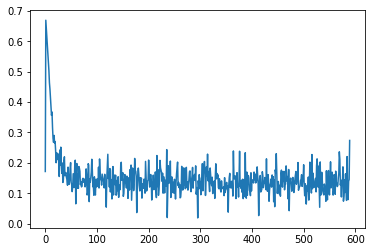

In [201]:
plt.plot(loss_over_time)

In [202]:
dataiter = iter(train_loader)
input_data, labels = dataiter.next()
lstm_model(input_data) >= 0.5

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

In [203]:
labels

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0

In [204]:
batch_size

32

In [205]:
labels.shape

torch.Size([32, 6])

In [210]:
import numpy as np
num_classes = 6
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
lstm_model.eval()

# get the input images and their corresponding labels
inputs, labels = test_loader.dataset.tensors

# forward pass to get outputs
outputs = lstm_model(inputs)

# calculate the loss
loss = criterion(outputs, labels)

# update average test loss 
test_loss = test_loss + ((torch.ones(1) / (len(labels) + 1)) * (loss.data - test_loss))

# get the predicted class from the maximum value in the output-list of class scores
for j in range(num_classes):
    # compare predictions to true label
    predicted_class = np.round(outputs.data[:,j])
    labels_class = labels.data[:,j]
    class_correct[j] = (predicted_class == labels_class).sum()
    class_total[j] = len(labels)
           
print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            label_colnames[i], 100 * class_correct[i] / class_total[i],
            (class_correct[i]), (class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (label_colnames[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.000057

Test Accuracy of toxic: 90% (2258/2500)
Test Accuracy of severe_toxic: 99% (2477/2500)
Test Accuracy of obscene: 94% (2359/2500)
Test Accuracy of threat: 99% (2492/2500)
Test Accuracy of insult: 94% (2368/2500)
Test Accuracy of identity_hate: 99% (2484/2500)

Test Accuracy (Overall): 96% (14438/15000)


In [215]:
(len(labels)) - labels[:,0].sum()

tensor(2257.)

In [208]:
250-28

222